In [1]:
%matplotlib inline

import os
import pandas as pd
import numpy as np
import sklearn as sk
from sklearn import linear_model as lm
import matplotlib
matplotlib.use('Agg')
import matplotlib.pyplot as plt

/usr/lib/pymodules/python2.7/matplotlib/__init__.py:1173: UserWarning:  This call to matplotlib.use() has no effect
because the backend has already been chosen;
matplotlib.use() must be called *before* pylab, matplotlib.pyplot,
or matplotlib.backends is imported for the first time.

  warnings.warn(_use_error_msg)


In [2]:
from sklearn import preprocessing as skprepro

In [3]:
os.chdir("..")

In [4]:
df = pd.read_csv("Data/mower_market_datasets/mower_market_snapshot.csv", sep=";")

In [5]:
df.head()

,capacity,failure_rate,id,margin,price,prod_cost,product_type,quality,warranty,market_share,attractiveness
0,10.492623,0.042528,18377,633.766584,828.802103,195.03551928211797,auto-portee,Low,3ans,0.006360,0.650648
1,20.273730,0.037896,19363,731.576817,882.894916,151.31809934886763,auto-portee,Low,3 ans.,0.006840,0.699792
2,20.190457,0.039111,19641,741.218202,919.355522,178.13731921134948,auto-portee,Low,3_ans,0.006179,0.632129
3,27.220131,0.041303,18728,654.255635,817.085097,162.82946157588628,auto-portee,Low,3 anss,0.007925,0.810730
4,16.370911,0.037938,18722,703.094527,844.581465,141.48693796090603,auto-portee,Medium,3ans.,0.007406,0.757614


In [6]:
df.shape

(1399, 11)

In [7]:
df.id.nunique()

1399

In [8]:
df.isnull().sum()

capacity           0
failure_rate       0
id                 0
margin             0
price              0
prod_cost         18
product_type       0
quality            0
warranty           0
market_share       0
attractiveness     0
dtype: int64

In [9]:
df.dtypes

capacity          float64
failure_rate      float64
id                  int64
margin            float64
price             float64
prod_cost          object
product_type       object
quality            object
warranty           object
market_share      float64
attractiveness    float64
dtype: object

In [10]:
for i in df.dtypes.keys():
    if df.dtypes[i]=='object':
        print(i, df[i].nunique())

('prod_cost', 1333)
('product_type', 3)
('quality', 3)
('warranty', 27)


In [11]:
df.prod_cost = pd.to_numeric(df.prod_cost, errors='coerce')

In [12]:
df.isnull().sum()

capacity           0
failure_rate       0
id                 0
margin             0
price              0
prod_cost         31
product_type       0
quality            0
warranty           0
market_share       0
attractiveness     0
dtype: int64

In [13]:
df1 = df[df['prod_cost'].isnull()==False]

In [14]:
df1.shape

(1368, 11)

In [15]:
pd.to_numeric(df1.warranty.apply(lambda x : x[0]), errors='coerce').isnull().sum()

0

In [16]:
pd.to_numeric(df1.warranty.apply(lambda x : x[:2]), errors='coerce').isnull().sum()

889

In [17]:
sum(10 <= pd.to_numeric(df1.warranty.apply(lambda x : x[:2]), errors='coerce'))

0

In [18]:
pd.to_numeric(df1.warranty.apply(lambda x : x[:3]), errors='coerce').isnull().sum()

1368

In [19]:
df1.warranty = df1.apply(lambda x : pd.to_numeric(x.warranty[0], errors='coerce'), axis=1)

/usr/local/lib/python2.7/dist-packages/pandas/core/generic.py:4401: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  self[name] = value


In [20]:
df1.quality.unique()

array(['Low', 'Medium', 'Hight'], dtype=object)

In [21]:
quality_dico = {'Low' : 1, 'Medium' : 2, 'Hight' : 3}
df1.quality.replace(quality_dico, inplace=True)

/usr/local/lib/python2.7/dist-packages/pandas/core/generic.py:5886: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  self._update_inplace(new_data)


In [22]:
df2 = pd.get_dummies(df1, columns=["product_type"])

In [23]:
df2.head()

,capacity,failure_rate,id,margin,price,prod_cost,quality,warranty,market_share,attractiveness,product_type_auto-portee,product_type_electrique,product_type_essence
0,10.492623,0.042528,18377,633.766584,828.802103,195.035519,1,3,0.006360,0.650648,1,0,0
1,20.273730,0.037896,19363,731.576817,882.894916,151.318099,1,3,0.006840,0.699792,1,0,0
2,20.190457,0.039111,19641,741.218202,919.355522,178.137319,1,3,0.006179,0.632129,1,0,0
3,27.220131,0.041303,18728,654.255635,817.085097,162.829462,1,3,0.007925,0.810730,1,0,0
4,16.370911,0.037938,18722,703.094527,844.581465,141.486938,2,3,0.007406,0.757614,1,0,0


In [24]:
df2.market_share.sum()

2.9326064274075163

In [25]:
train_col = filter(lambda x : x not in ['id', 'index', 'market_share'], df2.columns)

In [26]:
df2.shape

(1368, 13)

/usr/lib/pymodules/python2.7/matplotlib/collections.py:548: FutureWarning: elementwise comparison failed; returning scalar instead, but in the future will perform elementwise comparison
  if self._edgecolors == 'face':


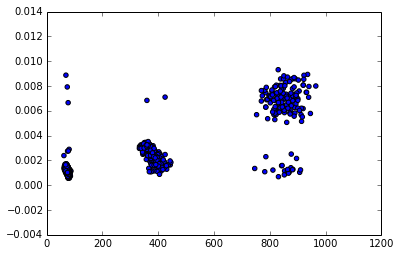

In [27]:
plt.scatter(df2['price'], df2['market_share'])

In [28]:
c = 2
l = len(train_col)//c + 1

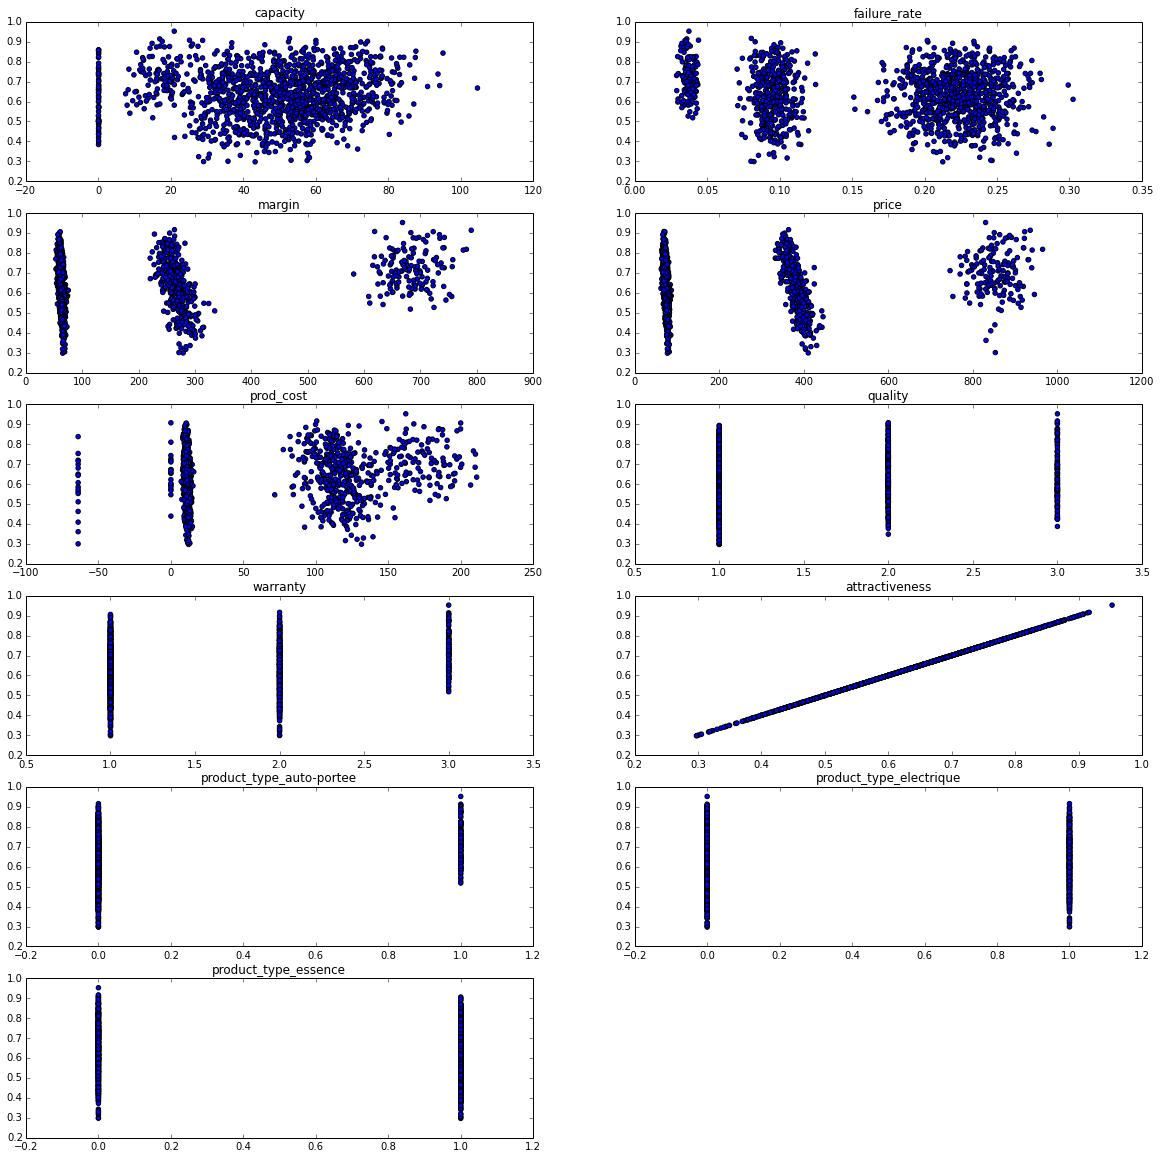

In [29]:
from matplotlib import gridspec

plt.figure(figsize=(20, 20))
i = 0
gs = gridspec.GridSpec(len(train_col)//2+1, 2)
for col in train_col:
    plt.subplot(gs[i])
    #plt.plot(df2[col], df2['market_share'], '.')
    plt.subplot(gs[i]).set_title(col)
    plt.scatter(df2[col], df2['attractiveness'])
    i+=1

In [30]:
df2[df2.prod_cost < 0].shape

(18, 13)

In [31]:
df3 = df2[0 < df2.prod_cost]

In [32]:
df3.shape

(1330, 13)

In [33]:
train = df3.sample(frac=0.8)
test = df3.drop(train.index).reset_index()
train = train.reset_index()

In [34]:
train.head()

,index,capacity,failure_rate,id,margin,price,prod_cost,quality,warranty,market_share,attractiveness,product_type_auto-portee,product_type_electrique,product_type_essence
0,1295,61.997960,0.230499,19073,66.181727,77.845500,11.663773,1,1,0.001123,0.592668,0,0,1
1,286,47.284888,0.108528,18293,282.094582,370.514063,88.419482,2,2,0.003257,0.848765,0,1,0
2,1174,75.332128,0.222694,19021,67.550452,77.984295,10.433843,1,1,0.000972,0.512629,0,0,1
3,470,0.041967,0.100856,18623,290.996980,412.538436,121.541456,1,2,0.001614,0.420593,0,1,0
4,592,63.588097,0.223921,19558,60.653541,71.684100,11.030560,1,1,0.001447,0.763586,0,0,1


In [35]:
train_col =  list(filter(lambda x : x not in ['index', 'id', 'market_share', 'attractiveness'], df3.columns))
target_col = 'attractiveness'

In [36]:
import API.model_testing as mt

In [37]:
X , Y = mt.split_dataframe(df3, train_col, target_col)

In [82]:
X.columns

Index([u'capacity', u'failure_rate', u'margin', u'price', u'prod_cost',
       u'quality', u'warranty', u'product_type_auto-portee',
       u'product_type_electrique', u'product_type_essence'],
      dtype='object')

In [38]:
train_X, test_X = mt.sample_dataframe(X)

In [39]:
train_Y = Y[train_X.index.values.tolist()]
test_Y = Y[test_X.index.values.tolist()]

In [74]:
scaler.mean_

array([4.76222075e+01, 1.66273933e-01, 1.86133891e+02, 2.44018130e+02,
       5.78842394e+01, 1.39849624e+00, 1.49849624e+00, 1.00751880e-01,
       2.96992481e-01, 6.02255639e-01])

In [77]:
scaler.var_

array([3.97029601e+02, 5.39342934e-03, 3.62609336e+04, 6.07998007e+04,
       3.63897524e+03, 4.29170671e-01, 4.51501498e-01, 9.06009384e-02,
       2.08787947e-01, 2.39543784e-01])

In [40]:
model = sk.linear_model.Ridge()
#model = sk.linear_model.LinearRegression()

In [41]:
model.fit(train_X, train_Y)

Ridge(alpha=1.0, copy_X=True, fit_intercept=True, max_iter=None,
   normalize=False, random_state=None, solver='auto', tol=0.001)

In [43]:
pred_test_X = model.predict(test_X)

In [44]:
sk.metrics.mean_squared_error(test_Y, pred_test_X)

0.011703383653233578

In [45]:
sk.metrics.mean_squared_error(test_Y, pred_test_X)/test_Y.mean()

0.01859954432577026

In [46]:
sk.metrics.mean_squared_error(np.log(test_Y + 1), np.log(pred_test_X+1))

/usr/local/lib/python2.7/dist-packages/pandas/core/computation/check.py:17: UserWarning: The installed version of numexpr 2.2.2 is not supported in pandas and will be not be used
The minimum supported version is 2.4.6

  ver=ver, min_ver=_MIN_NUMEXPR_VERSION), UserWarning)


0.004529726632269665

In [47]:
sk.metrics.mean_squared_error(np.log(test_Y + 1), np.log(pred_test_X+1))/test_Y.mean()

0.007198845545599426

In [48]:
model.fit(train_X, np.log(train_Y+1))

Ridge(alpha=1.0, copy_X=True, fit_intercept=True, max_iter=None,
   normalize=False, random_state=None, solver='auto', tol=0.001)

In [50]:
pred_test_X = model.predict(test_X)

In [51]:
sk.metrics.mean_squared_error(np.log(test_Y+1), pred_test_X)

0.0045137064594353024

In [52]:
sk.metrics.mean_squared_error(np.log(test_Y+1), pred_test_X)/test_Y.mean()

0.0071733855655143584

In [53]:
sk.metrics.mean_squared_error(np.log(test_Y+1), pred_test_X)/np.log(test_Y+1).mean()

0.009301791981780943

In [63]:
df3.head()

,capacity,failure_rate,id,margin,price,prod_cost,quality,warranty,market_share,attractiveness,product_type_auto-portee,product_type_electrique,product_type_essence
0,10.492623,0.042528,18377,633.766584,828.802103,195.035519,1,3,0.006360,0.650648,1,0,0
1,20.273730,0.037896,19363,731.576817,882.894916,151.318099,1,3,0.006840,0.699792,1,0,0
2,20.190457,0.039111,19641,741.218202,919.355522,178.137319,1,3,0.006179,0.632129,1,0,0
3,27.220131,0.041303,18728,654.255635,817.085097,162.829462,1,3,0.007925,0.810730,1,0,0
4,16.370911,0.037938,18722,703.094527,844.581465,141.486938,2,3,0.007406,0.757614,1,0,0
